In [2]:
import keras
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
df = pd.read_csv("Bank_Customer_Churn.csv")
df.sample(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
6387,6388,15810807,Alekseeva,513,France,Female,43,9,0.00,2,1,0,152499.80,0
9374,9375,15632538,Watson,658,Spain,Female,32,5,145553.07,1,1,1,31484.76,0
7378,7379,15641715,Ts'ui,599,France,Male,34,8,0.00,2,1,1,174196.68,0
9943,9944,15659495,Fu,784,Spain,Male,23,2,0.00,1,1,1,6847.73,0
7237,7238,15753550,Levien,684,France,Female,43,7,0.00,2,1,0,131093.99,0


In [4]:
df.shape

(10000, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


# data cleaning

remove unwanted columns

In [6]:
df0 = df.drop(['RowNumber',	'CustomerId'	,'Surname'] , axis=1 )

view object columns unique values

In [7]:
for col in df0:
    if df0[col].dtype == 'object':
        print(col , ' - ' , df0[col].unique())

Geography  -  ['France' 'Spain' 'Germany']
Gender  -  ['Female' 'Male']


replace : Male => 1
replace : Female => 0

In [8]:
df1 = df0.copy()
df1.replace('Male',1,inplace=True)
df1.replace('Female',0,inplace=True)

In [10]:
df1.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [9]:
df1.describe()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,0.545700,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,0.497932,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,0.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,0.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,1.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,1.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,1.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


# Data Visualizing

In [15]:
def plot_exited_hist(df , col):
    churn_no = df[df.Exited==0][col]
    churn_yes = df[df.Exited==1][col]

    plt.xlabel(col)
    plt.ylabel("Number Of Customers")
    plt.title("Customer Churn Prediction Visualiztion")


    plt.hist([churn_yes, churn_no], rwidth=0.95, color=['green','red'],label=['Exited=Yes','Exited=No'])
    plt.legend()
    plt.show()

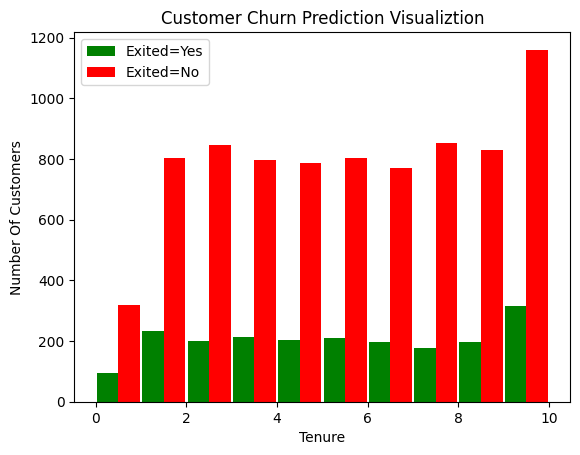

In [17]:

plot_exited_hist(df , 'Tenure')

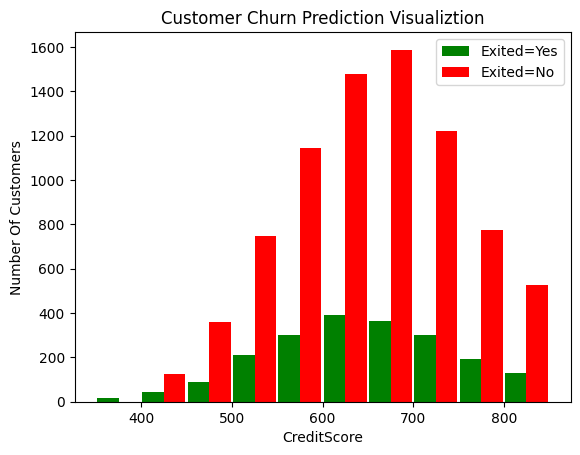

In [14]:
plot_exited_hist(df , 'CreditScore')


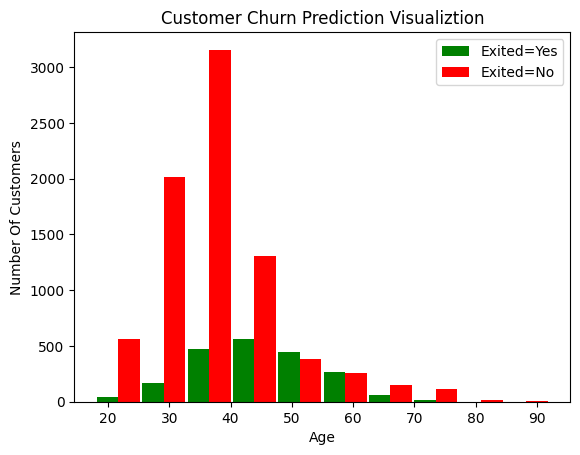

In [19]:
plot_exited_hist(df , 'Age')


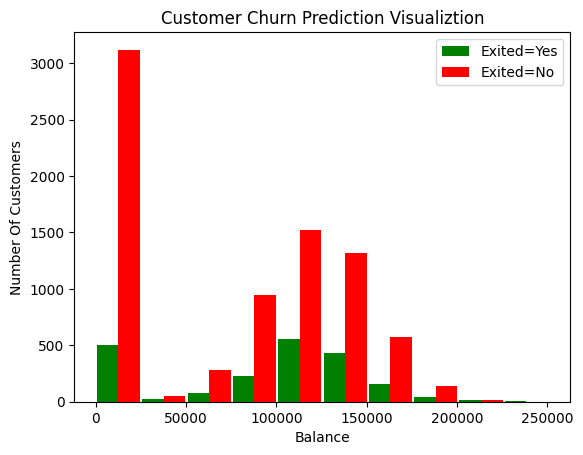

In [20]:
plot_exited_hist(df ,  'Balance')

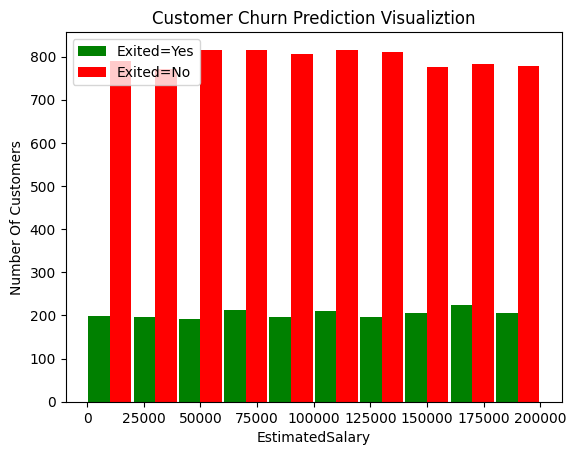

In [21]:
plot_exited_hist(df ,  'EstimatedSalary')

# Remove Outliers

# one hot encoding on location feature

In [29]:
discrete_var = ['Geography']
dummies = pd.get_dummies( df1[discrete_var] , drop_first=True)

dummies.replace(True,1,inplace=True)
dummies.replace(False,0,inplace=True)

reduced_df  = df1.drop( discrete_var  , axis=1)
df2 = pd.concat([dummies , reduced_df  ] , axis=1 )
df2.head()

,Geography_Germany,Geography_Spain,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,0,619,0,42,2,0.00,1,1,1,101348.88,1
1,0,1,608,0,41,1,83807.86,1,0,1,112542.58,0
2,0,0,502,0,42,8,159660.80,3,1,0,113931.57,1
3,0,0,699,0,39,1,0.00,2,0,0,93826.63,0
4,0,1,850,0,43,2,125510.82,1,1,1,79084.10,0


# Sacling The MonthlyCharges	TotalCharges columns

In [30]:
from sklearn.preprocessing import MinMaxScaler

normal_var = ["CreditScore"		,"Age"	,"Tenure"	,"Balance"		,"EstimatedSalary"	]
df_final = df2.copy()

sc = MinMaxScaler()

cont_var = []
df_final[normal_var] = sc.fit_transform(df1[normal_var])
df_final[normal_var].describe()

,CreditScore,Age,Tenure,Balance,EstimatedSalary
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.601058,0.282727,0.501280,0.304848,0.500441
std,0.193307,0.141727,0.289217,0.248696,0.287580
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.468000,0.189189,0.300000,0.000000,0.254977
50%,0.604000,0.256757,0.500000,0.387402,0.500960
75%,0.736000,0.351351,0.700000,0.508749,0.746955
max,1.000000,1.000000,1.000000,1.000000,1.000000


In [31]:
df_final.dtypes

Geography_Germany      int64
Geography_Spain        int64
CreditScore          float64
Gender                 int64
Age                  float64
Tenure               float64
Balance              float64
NumOfProducts          int64
HasCrCard              int64
IsActiveMember         int64
EstimatedSalary      float64
Exited                 int64
dtype: object

# splitting the train test

In [32]:
X = df_final.drop('Exited' , axis = 1)
y = df_final['Exited']

In [33]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(X , y, test_size=0.3 ,random_state=25 )
x_train.shape , x_test.shape 

((7000, 11), (3000, 11))

In [34]:
y_train.shape

(7000,)

In [42]:
model = keras.Sequential([
    
    keras.layers.Dense(  20, input_shape = ( x_train.shape[1] , )  , activation = 'relu'   ),
    keras.layers.Dense(  10  ),
    keras.layers.Dense(  1   , activation = 'sigmoid')   
] )
opt = keras.optimizers.Adam(learning_rate=0.05)

model.compile( 
              optimizer=opt,
              loss ='binary_crossentropy',
              metrics = ['accuracy']
              )

model.fit(x_train , y_train , epochs=10)

Epoch 1/10
219/219 [==============================] - 2s 4ms/step - loss: 0.4664 - accuracy: 0.7984
Epoch 2/10
219/219 [==============================] - 1s 4ms/step - loss: 0.4284 - accuracy: 0.8207
Epoch 3/10
219/219 [==============================] - 1s 4ms/step - loss: 0.4092 - accuracy: 0.8271
Epoch 4/10
219/219 [==============================] - 1s 4ms/step - loss: 0.3942 - accuracy: 0.8316
Epoch 5/10
219/219 [==============================] - 1s 4ms/step - loss: 0.3768 - accuracy: 0.8423
Epoch 6/10
219/219 [==============================] - 1s 4ms/step - loss: 0.3762 - accuracy: 0.8446
Epoch 7/10
219/219 [==============================] - 1s 4ms/step - loss: 0.3687 - accuracy: 0.8443
Epoch 8/10
219/219 [==============================] - 1s 4ms/step - loss: 0.3827 - accuracy: 0.8411
Epoch 9/10
219/219 [==============================] - 1s 4ms/step - loss: 0.3681 - accuracy: 0.8484
Epoch 10/10
219/219 [==============================] - 1s 4ms/step - loss: 0.3703 - accuracy: 0.8484

In [43]:
model.evaluate(x_test , y_test)

94/94 [==============================] - 1s 4ms/step - loss: 0.3523 - accuracy: 0.8537


[0.3522528409957886, 0.8536666631698608]

In [44]:
def convert_pred(y):
    return np.array(  list(map( lambda x  : 1 if x >= 0.5  else 0  , y) ))

convert_pred([0.2, 0.8])

array([0, 1])

In [45]:
y_pred = model.predict(x_test)
y_pred = convert_pred( y_pred)

94/94 [==============================] - 1s 4ms/step


In [46]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.95      0.91      2419
           1       0.70      0.44      0.54       581

    accuracy                           0.85      3000
   macro avg       0.79      0.69      0.72      3000
weighted avg       0.84      0.85      0.84      3000



Text(95.72222222222221, 0.5, 'Truth')

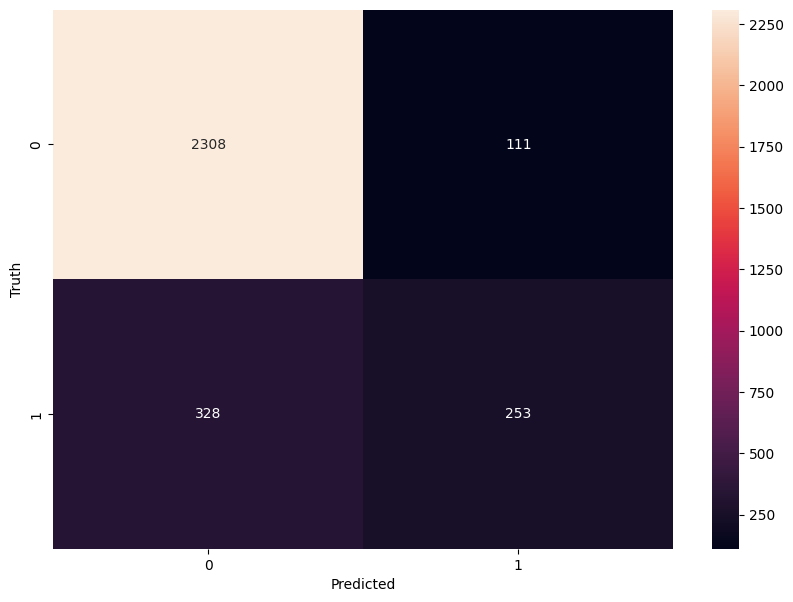

In [48]:
import seaborn as sn
import tensorflow as tf

cm = confusion_matrix( y_test,y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

Precision

In [52]:
precision_0 = 1374 / (1374 + 286)
precision_1 = 271 / (271+179)
precision_0 , precision_1

(0.827710843373494, 0.6022222222222222)

recall

In [53]:
recall_0 = 1374 / (1374 + 179)
recall_1 = 271 / (271+286)
recall_0 , recall_1

(0.8847392144236961, 0.4865350089766607)

accuracy

In [54]:
round((862+229)/(862+229+137+179),2)

0.78